# Items' Zones & Volumes Preparation

In [271]:
import pandas as pd
# from the '../data/raw/' folder, import the 'items.csv' file:
items = pd.read_csv('../data/raw/items.csv')
# lower case all the column names:
items.columns = map(str.lower, items.columns)
# replace all the spaces in the column names with underscores:
items.columns = items.columns.str.replace(' ', '_')
# uppercase all values under 'putaway_zone' column:
items['putaway_zone'] = items['putaway_zone'].str.upper()
# remove all instances of \r and \n from all columns:
items = items.replace(r'\r', '', regex=True)
items = items.replace(r'\n', '', regex=True)
# replace all whitespaces in the 'putaway_zone' column with underscores:
items['putaway_zone'] = items['putaway_zone'].str.replace(' ', '_')
items

,uuid,putaway_zone,volume
0,A000001,CANTI-LIGHT,36.00
1,A000002,CANTI-LIGHT,144.00
2,A000003,OPT-A-05-07,729.00
3,A000004,OPT-C-01-04,259.20
4,A000005,OPT-A-01-04,911.25
...,...,...,...
30472,A030473,OPT-B-07-11,14850.00
30473,A030474,OPT-C-01-04,15055.20
30474,A030475,PALLET-C,400000.00
30475,A030476,OPT-B-05-07,0.00


## Calculate attractiveness of each item:

In [272]:
# from the 'data/processed/' folder, import the 'activity_data.csv' file:
activity_data = pd.read_csv('../data/processed/activity_data.csv')
activity_data

,uuid,date,qty,inv_qty,shipments,items_in_shipments
0,A014629,2021-01-01,10.0,3,0.0,0.0
1,A030243,2021-01-01,1.0,1,0.0,0.0
2,A016063,2021-01-01,1.0,1,0.0,0.0
3,A022751,2021-01-01,1.0,1,0.0,0.0
4,A001667,2021-01-01,5.0,1,0.0,0.0
...,...,...,...,...,...,...
381758,A026555,2023-05-29,1.0,1,0.0,0.0
381759,A024159,2023-05-29,2.0,2,0.0,0.0
381760,A016588,2023-05-29,36.0,27,0.0,0.0
381761,A026364,2023-05-29,1.0,1,0.0,0.0


In [273]:
# group the 'activity_data' DataFrame by 'id' and sum the 'inv_qty' column and output a new DataFrame:
activity_data_grouped = activity_data.groupby('uuid')['inv_qty'].sum().reset_index().sort_values('inv_qty', ascending=False)
# calculate the 'attractiveness' of each item by dividing the 'inv_qty' column by the max value of the 'inv_qty' column:
activity_data_grouped['attractiveness'] = activity_data_grouped['inv_qty'] / activity_data_grouped['inv_qty'].max()
activity_data_grouped

,uuid,inv_qty,attractiveness
11363,A015266,22068,1.000000
12330,A016588,13730,0.622168
12321,A016579,7596,0.344209
12331,A016589,6983,0.316431
12323,A016581,4303,0.194988
...,...,...,...
822,A001096,0,0.000000
2239,A003099,0,0.000000
13554,A018195,0,0.000000
14680,A019689,0,0.000000


In [274]:
# count the number items in the 'activity_data_grouped' DataFrame with an 'attractiveness' value of 0:
activity_data_grouped[activity_data_grouped['attractiveness'] == 0].count()

uuid              1117
inv_qty           1117
attractiveness    1117
dtype: int64

In [275]:
# merge the 'activity_data_grouped' DataFrame with the 'items' DataFrame on the 'id' column:
items = pd.merge(items, activity_data_grouped[['uuid', 'attractiveness']], on='uuid', how='left')
items

,uuid,putaway_zone,volume,attractiveness
0,A000001,CANTI-LIGHT,36.00,0.000045
1,A000002,CANTI-LIGHT,144.00,NaN
2,A000003,OPT-A-05-07,729.00,0.000045
3,A000004,OPT-C-01-04,259.20,0.000045
4,A000005,OPT-A-01-04,911.25,0.000045
...,...,...,...,...
30472,A030473,OPT-B-07-11,14850.00,0.000000
30473,A030474,OPT-C-01-04,15055.20,0.000136
30474,A030475,PALLET-C,400000.00,0.000680
30475,A030476,OPT-B-05-07,0.00,0.000091


In [276]:
# fill the NaN values in the 'attractiveness' column with 0:
items['attractiveness'] = items['attractiveness'].fillna(0)

## Clean problematic items

In [277]:
# convert the 'volume' column from milimeters squared to meters squared:
items['volume'] = items['volume'] / 1000000
items

,uuid,putaway_zone,volume,attractiveness
0,A000001,CANTI-LIGHT,0.000036,0.000045
1,A000002,CANTI-LIGHT,0.000144,0.000000
2,A000003,OPT-A-05-07,0.000729,0.000045
3,A000004,OPT-C-01-04,0.000259,0.000045
4,A000005,OPT-A-01-04,0.000911,0.000045
...,...,...,...,...
30472,A030473,OPT-B-07-11,0.014850,0.000000
30473,A030474,OPT-C-01-04,0.015055,0.000136
30474,A030475,PALLET-C,0.400000,0.000680
30475,A030476,OPT-B-05-07,0.000000,0.000091


In [278]:
# from the 'putaway_zone' column, remove any incident of \n:
items['putaway_zone'] = items['putaway_zone'].str.replace('\n', '')

## Fill in `putaway zone`

 By cross-referencing missing values with the `positions` table

In [279]:
# from the 'data/processed/' folder, import the 'positions.csv' file:
positions = pd.read_csv('../data/processed/positions.csv')
# replace white spaces in the 'putaway_zone' column with underscores:
positions['putaway_zone'] = positions['putaway_zone'].str.replace(' ', '_')
positions['fetch_zone'] = positions['fetch_zone'].str.replace(' ', '_')
positions['fetch_tool'] = positions['fetch_tool'].str.replace(' ', '_')
positions

,uuid,location,last_count_date,quantity,receive_date,last_status_change_date,last_movement_date,putaway_zone,fetch_zone,warehouse_zone,aisle,fetch_tool
0,A024200,010101,2023-04-17 11:59:00,28,2023-05-10 12:32:00,2022-01-20 13:42:00,2022-01-20 13:42:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
1,A017062,010101,2023-04-17 12:00:00,2,2023-01-23 14:51:00,2023-01-18 12:03:00,2023-01-19 10:43:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
2,A026194,010101,2023-04-17 12:13:00,6,2023-01-08 12:12:00,2022-01-20 14:15:00,2023-04-17 12:14:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
3,A012596,010101,2023-04-17 12:07:00,6,2022-01-20 14:06:00,2022-01-20 14:06:00,2023-04-17 12:08:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
4,A017601,010101,2023-04-17 12:04:00,3,2023-04-13 06:34:00,2022-01-20 14:02:00,2022-01-20 14:02:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
...,...,...,...,...,...,...,...,...,...,...,...,...
23812,A005873,FLOOR04,NaN,1,2023-02-08 10:36:00,2023-02-08 10:36:00,2023-02-09 11:15:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK
23813,A005529,FLOOR04,NaN,1,2022-11-02 09:43:00,2022-11-02 09:43:00,2022-11-03 13:03:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK
23814,A011879,FLOOR04,NaN,1,2023-02-08 10:37:00,2023-02-08 10:37:00,2023-02-09 10:55:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK
23815,A011867,FLOOR04,2023-03-30 13:25:00,2,2023-02-20 14:41:00,2023-02-20 14:41:00,2023-02-21 09:50:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK


In [280]:
# group the 'positions' DataFrame by 'uuid' and count how many values of 'putaway_zone' are in each group:
positions_grouped = positions.groupby(['uuid', 'putaway_zone']).size().reset_index(name='count').sort_values(by=['uuid', 'count'])
positions_grouped

,uuid,putaway_zone,count
0,A000002,CANTI-LIGHT,1
1,A000005,MERAKEZET,1
2,A000006,OPT-B-01-04,1
3,A000007,OPT-A-01-04,1
4,A000009,OPT-B-01-04,1
...,...,...,...
22926,A030471,OPT-C-07-11,1
22927,A030472,OPT-C-07-11,1
22928,A030474,OPT-C-05-07,1
22929,A030476,OPT-B-05-07,1


In [281]:
# filter the DF to show each 'uuid' which appears in more than one row:
positions_grouped[positions_grouped['uuid'].duplicated(keep=False)]

,uuid,putaway_zone,count
31,A000048,CANTI-HEAVY,1
32,A000048,CANTI-LIGHT,1
37,A000058,CANTI-LIGHT,1
38,A000058,PALLET-B,1
50,A000072,CANTI-HEAVY,1
...,...,...,...
22908,A030454,OPT-B-05-07,2
22910,A030454,OPT-C-05-07,2
22923,A030470,OPT-B-01-04,1
22924,A030470,OPT-C-05-07,1


In [282]:
# group by 'uuid' and get the 'putaway_zone' with the highest 'count':
positions_grouped = positions_grouped.groupby('uuid').agg({'putaway_zone': 'last'}).reset_index()
positions_grouped

,uuid,putaway_zone
0,A000002,CANTI-LIGHT
1,A000005,MERAKEZET
2,A000006,OPT-B-01-04
3,A000007,OPT-A-01-04
4,A000009,OPT-B-01-04
...,...,...
21712,A030471,OPT-C-07-11
21713,A030472,OPT-C-07-11
21714,A030474,OPT-C-05-07
21715,A030476,OPT-B-05-07


In [283]:
# merge the 'activity_data_grouped' DataFrame with the 'items' DataFrame on the 'id' column:
items_with_putaway = pd.merge(items, positions_grouped[['uuid', 'putaway_zone']], on='uuid', how='left')
items_with_putaway

,uuid,putaway_zone_x,volume,attractiveness,putaway_zone_y
0,A000001,CANTI-LIGHT,0.000036,0.000045,NaN
1,A000002,CANTI-LIGHT,0.000144,0.000000,CANTI-LIGHT
2,A000003,OPT-A-05-07,0.000729,0.000045,NaN
3,A000004,OPT-C-01-04,0.000259,0.000045,NaN
4,A000005,OPT-A-01-04,0.000911,0.000045,MERAKEZET
...,...,...,...,...,...
30472,A030473,OPT-B-07-11,0.014850,0.000000,NaN
30473,A030474,OPT-C-01-04,0.015055,0.000136,OPT-C-05-07
30474,A030475,PALLET-C,0.400000,0.000680,NaN
30475,A030476,OPT-B-05-07,0.000000,0.000091,OPT-B-05-07


In [284]:
# check for missing values:
print(items_with_putaway.isna().sum())
# check how many rows have different values in the 'putaway_zone' column:
print(items_with_putaway[items_with_putaway['putaway_zone_x'] != items_with_putaway['putaway_zone_y']])

uuid                 0
putaway_zone_x     682
volume               0
attractiveness       0
putaway_zone_y    8760
dtype: int64
          uuid putaway_zone_x    volume  attractiveness putaway_zone_y
0      A000001    CANTI-LIGHT  0.000036        0.000045            NaN
2      A000003    OPT-A-05-07  0.000729        0.000045            NaN
3      A000004    OPT-C-01-04  0.000259        0.000045            NaN
4      A000005    OPT-A-01-04  0.000911        0.000045      MERAKEZET
5      A000006    OPT-C-01-04  0.000196        0.000000    OPT-B-01-04
...        ...            ...       ...             ...            ...
30470  A030471    OPT-C-01-04  0.009000        0.000000    OPT-C-07-11
30471  A030472    OPT-C-05-07  0.102400        0.000000    OPT-C-07-11
30472  A030473    OPT-B-07-11  0.014850        0.000000            NaN
30473  A030474    OPT-C-01-04  0.015055        0.000136    OPT-C-05-07
30474  A030475       PALLET-C  0.400000        0.000680            NaN

[24432 rows x 5 col

In [285]:
# fill in missing values in the 'putaway_zone' column by the following logic:
# if the 'putaway_zone_y' column is not null, use that value
# else, use the value in the 'putaway_zone_x' column
items_with_putaway['putaway_zone'] = items_with_putaway['putaway_zone_y'].fillna(items_with_putaway['putaway_zone_x'])
items_with_putaway

,uuid,putaway_zone_x,volume,attractiveness,putaway_zone_y,putaway_zone
0,A000001,CANTI-LIGHT,0.000036,0.000045,NaN,CANTI-LIGHT
1,A000002,CANTI-LIGHT,0.000144,0.000000,CANTI-LIGHT,CANTI-LIGHT
2,A000003,OPT-A-05-07,0.000729,0.000045,NaN,OPT-A-05-07
3,A000004,OPT-C-01-04,0.000259,0.000045,NaN,OPT-C-01-04
4,A000005,OPT-A-01-04,0.000911,0.000045,MERAKEZET,MERAKEZET
...,...,...,...,...,...,...
30472,A030473,OPT-B-07-11,0.014850,0.000000,NaN,OPT-B-07-11
30473,A030474,OPT-C-01-04,0.015055,0.000136,OPT-C-05-07,OPT-C-05-07
30474,A030475,PALLET-C,0.400000,0.000680,NaN,PALLET-C
30475,A030476,OPT-B-05-07,0.000000,0.000091,OPT-B-05-07,OPT-B-05-07


In [286]:
# show all the rows where the 'putaway_zone' column is null:
items_with_putaway[items_with_putaway['putaway_zone'].isna()].sort_values('attractiveness', ascending=False)

,uuid,putaway_zone_x,volume,attractiveness,putaway_zone_y,putaway_zone
17307,A017308,NaN,1.000000e-09,0.042913,NaN,NaN
20976,A020977,NaN,0.000000e+00,0.014002,NaN,NaN
13249,A013250,NaN,7.599085e-03,0.001495,NaN,NaN
17358,A017359,NaN,1.000000e-09,0.001088,NaN,NaN
26920,A026921,NaN,0.000000e+00,0.000861,NaN,NaN
...,...,...,...,...,...,...
13964,A013965,NaN,1.032300e-02,0.000000,NaN,NaN
11215,A011216,NaN,2.996280e-02,0.000000,NaN,NaN
13693,A013694,NaN,2.107000e-06,0.000000,NaN,NaN
6265,A006266,NaN,4.500000e-07,0.000000,NaN,NaN


In [287]:
import numpy as np
# replace the zero values in 'volume' with NaN:
items_with_putaway['volume'] = items_with_putaway['volume'].replace(0, np.nan)

In [288]:
# check for missing values:
items_with_putaway.isna().sum()

uuid                 0
putaway_zone_x     682
volume            1505
attractiveness       0
putaway_zone_y    8760
putaway_zone       522
dtype: int64

In [289]:
# count how many rows have a missing value in the 'putaway_zone' column, but not in the 'volume' column:
items_with_putaway[(items_with_putaway['putaway_zone'].isna()) & (items_with_putaway['volume'].notna())].count()

uuid              448
putaway_zone_x      0
volume            448
attractiveness    448
putaway_zone_y      0
putaway_zone        0
dtype: int64

## Calculate missing volumes

Use the following logic:
1. If the item is already stored somewhere in the `positions` table, use the `volume` of the `location` divided by the `quantity` of items at the `location` (**NOTE - Could be mutliple item types in one location). In the case of multiple `location`s for an item - pick the minimal `volume` from the results.
2. Else, use the `average volume` of items with the same `putaway zone`.

```python
# Path: notebooks\items_prep.ipynb
# Items' Zones & Volumes Preparation


In [348]:
# NOTICE: This cell will fail upon first run. Skip to the next cells, and then rerun everything from this cell onwards.

# for rows with a missing value in the 'putaway_zone' column, fill in the missing value with the 'putaway_zone' value from the 'putaway_zone_by_mean_volumes' DataFrame's row which has the closest 'volume' value:
items_with_putaway['putaway_zone'] = items_with_putaway.apply(lambda x: putaway_zone_by_mean_volumes.iloc[(putaway_zone_by_mean_volumes['volume'] - x['volume']).abs().argsort()[:1]]['putaway_zone'].values[0] if pd.isnull(x['putaway_zone']) else x['putaway_zone'], axis=1)
# check for missing values:
print(items_with_putaway.isna().sum())
items_with_putaway

uuid                 0
putaway_zone_x     682
volume            1505
attractiveness       0
putaway_zone_y    8760
putaway_zone         0
dtype: int64


,uuid,putaway_zone_x,volume,attractiveness,putaway_zone_y,putaway_zone
0,A000001,CANTI-LIGHT,0.000036,0.000045,NaN,CANTI-LIGHT
1,A000002,CANTI-LIGHT,0.000144,0.000000,CANTI-LIGHT,CANTI-LIGHT
2,A000003,OPT-A-05-07,0.000729,0.000045,NaN,OPT-A-05-07
3,A000004,OPT-C-01-04,0.000259,0.000045,NaN,OPT-C-01-04
4,A000005,OPT-A-01-04,0.000911,0.000045,MERAKEZET,MERAKEZET
...,...,...,...,...,...,...
30472,A030473,OPT-B-07-11,0.014850,0.000000,NaN,OPT-B-07-11
30473,A030474,OPT-C-01-04,0.015055,0.000136,OPT-C-05-07,OPT-C-05-07
30474,A030475,PALLET-C,0.400000,0.000680,NaN,PALLET-C
30475,A030476,OPT-B-05-07,NaN,0.000091,OPT-B-05-07,OPT-B-05-07


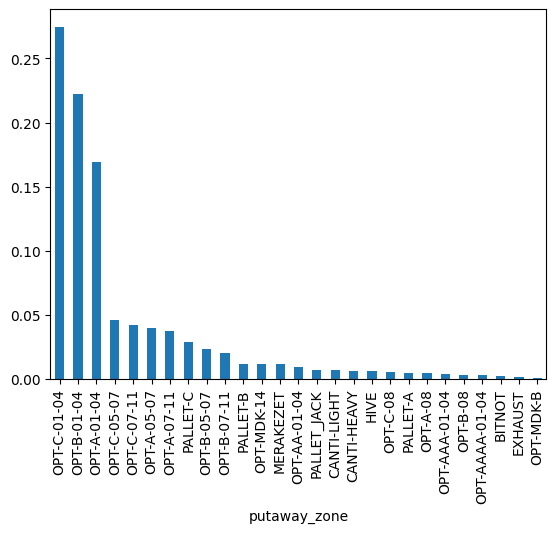

In [349]:
# show how items are distributed across the 'putaway_zone' column in percentage terms, using a chart:
import matplotlib.pyplot as plt
items_with_putaway['putaway_zone'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [350]:
# import the cells.csv file from the '../src/data/' folder, keep the 'location', and 'volume' columns:
cells = pd.read_csv('../src/data/cells.csv', usecols=['location', 'volume'])
cells

,location,volume
0,010101,0.487687
1,010102,0.522522
2,010103,0.487687
3,010104,0.487687
4,010105,0.522522
...,...,...
5663,603011,6.177375
5664,FLOOR01,717.187500
5665,FLOOR02,717.187500
5666,FLOOR03,717.187500


In [351]:
# merge the 'positions' dataframe with the 'items_with_putaway' dataframe's 'volume' column on the 'uuid' column:
positions_with_volume = pd.merge(positions, items_with_putaway[['uuid', 'volume']], on='uuid', how='left')
positions_with_volume.drop(columns=positions_with_volume.columns[positions_with_volume.columns.str.contains('date|zone|tool|aisle')], inplace=True)
positions_with_volume

,uuid,location,quantity,volume
0,A024200,010101,28,0.000355
1,A017062,010101,2,0.001408
2,A026194,010101,6,0.000300
3,A012596,010101,6,0.000003
4,A017601,010101,3,0.000141
...,...,...,...,...
23812,A005873,FLOOR04,1,0.505476
23813,A005529,FLOOR04,1,0.102528
23814,A011879,FLOOR04,1,0.276822
23815,A011867,FLOOR04,2,0.150000


In [352]:
# add the 'total_volume' column to the 'positions_with_volume' dataframe, which is the 'volume' column multiplied by the 'quantity' column:
positions_with_volume['total_volume'] = positions_with_volume['volume'] * positions_with_volume['quantity']
positions_with_volume

,uuid,location,quantity,volume,total_volume
0,A024200,010101,28,0.000355,0.009948
1,A017062,010101,2,0.001408,0.002816
2,A026194,010101,6,0.000300,0.001800
3,A012596,010101,6,0.000003,0.000020
4,A017601,010101,3,0.000141,0.000422
...,...,...,...,...,...
23812,A005873,FLOOR04,1,0.505476,0.505476
23813,A005529,FLOOR04,1,0.102528,0.102528
23814,A011879,FLOOR04,1,0.276822,0.276822
23815,A011867,FLOOR04,2,0.150000,0.300000


In [353]:
# group the 'positions_with_volume' dataframe by 'location' and sum the 'total_volume' column:
occupied_volume_by_location = positions_with_volume.groupby('location')['total_volume'].sum().reset_index()
# renamne the 'total_volume' column to 'occupied_volume':
occupied_volume_by_location.rename(columns={'total_volume': 'occupied_volume'}, inplace=True)
occupied_volume_by_location

,location,occupied_volume
0,010101,0.031328
1,010102,0.009491
2,010103,0.017205
3,010104,0.007859
4,010105,0.009934
...,...,...
4154,602611,0.177131
4155,FLOOR01,35.148408
4156,FLOOR02,45.547875
4157,FLOOR03,6.366837


In [354]:
# merge the 'cells' and 'occupied_volume_by_location' dataframes on the 'location' column:
cells = pd.merge(cells, occupied_volume_by_location, on='location', how='left')
cells

,location,volume,occupied_volume
0,010101,0.487687,0.031328
1,010102,0.522522,0.009491
2,010103,0.487687,0.017205
3,010104,0.487687,0.007859
4,010105,0.522522,0.009934
...,...,...,...
5663,603011,6.177375,NaN
5664,FLOOR01,717.187500,35.148408
5665,FLOOR02,717.187500,45.547875
5666,FLOOR03,717.187500,6.366837


In [355]:
cells['available_volume'] = cells['volume'] - cells['occupied_volume']
cells

,location,volume,occupied_volume,available_volume
0,010101,0.487687,0.031328,0.456360
1,010102,0.522522,0.009491,0.513031
2,010103,0.487687,0.017205,0.470482
3,010104,0.487687,0.007859,0.479828
4,010105,0.522522,0.009934,0.512588
...,...,...,...,...
5663,603011,6.177375,NaN,NaN
5664,FLOOR01,717.187500,35.148408,682.039092
5665,FLOOR02,717.187500,45.547875,671.639625
5666,FLOOR03,717.187500,6.366837,710.820663


In [356]:
# show all rows with missing values:
cells[cells['available_volume'].isna()]

,location,volume,occupied_volume,available_volume
21,010211,1.381781,NaN,NaN
22,010213,1.056656,NaN,NaN
23,010215,1.056656,NaN,NaN
24,010217,1.056656,NaN,NaN
25,010219,1.056656,NaN,NaN
...,...,...,...,...
5659,603003,6.177375,NaN,NaN
5660,603005,6.177375,NaN,NaN
5661,603007,5.039438,NaN,NaN
5662,603009,6.177375,NaN,NaN


In [357]:
# where the 'available_volume' column is null, fill in the missing value with the 'volume' value:
cells['available_volume'] = cells['available_volume'].fillna(cells['volume'])
# where the 'occupied_volume' column is null, fill in the missing value with zero:
cells['occupied_volume'] = cells['occupied_volume'].fillna(0)
cells

,location,volume,occupied_volume,available_volume
0,010101,0.487687,0.031328,0.456360
1,010102,0.522522,0.009491,0.513031
2,010103,0.487687,0.017205,0.470482
3,010104,0.487687,0.007859,0.479828
4,010105,0.522522,0.009934,0.512588
...,...,...,...,...
5663,603011,6.177375,0.000000,6.177375
5664,FLOOR01,717.187500,35.148408,682.039092
5665,FLOOR02,717.187500,45.547875,671.639625
5666,FLOOR03,717.187500,6.366837,710.820663


In [358]:
items_with_no_volume = items_with_putaway[items_with_putaway['volume'].isna()]
items_with_no_volume

,uuid,putaway_zone_x,volume,attractiveness,putaway_zone_y,putaway_zone
116,A000117,CANTI-LIGHT,NaN,0.000136,OPT-C-01-04,OPT-C-01-04
124,A000125,OPT-C-01-04,NaN,0.000045,OPT-B-01-04,OPT-B-01-04
217,A000218,OPT-C-01-04,NaN,0.000045,NaN,OPT-C-01-04
276,A000277,OPT-A-01-04,NaN,0.000045,OPT-B-01-04,OPT-B-01-04
281,A000282,OPT-A-01-04,NaN,0.000045,OPT-B-01-04,OPT-B-01-04
...,...,...,...,...,...,...
30406,A030407,NaN,NaN,0.000091,NaN,OPT-AA-01-04
30425,A030426,OPT-C-07-11,NaN,0.000091,OPT-C-07-11,OPT-C-07-11
30426,A030427,OPT-A-05-07,NaN,0.000045,OPT-C-07-11,OPT-C-07-11
30475,A030476,OPT-B-05-07,NaN,0.000091,OPT-B-05-07,OPT-B-05-07


In [359]:
# for the positions_with_volume dataframe, group by 'location' and sum the 'quantity' column, add this as a new column called 'items_at_location':
positions_with_volume['items_at_location'] = positions_with_volume.groupby('location')['quantity'].transform('sum')
positions_with_volume

,uuid,location,quantity,volume,total_volume,items_at_location
0,A024200,010101,28,0.000355,0.009948,142
1,A017062,010101,2,0.001408,0.002816,142
2,A026194,010101,6,0.000300,0.001800,142
3,A012596,010101,6,0.000003,0.000020,142
4,A017601,010101,3,0.000141,0.000422,142
...,...,...,...,...,...,...
23812,A005873,FLOOR04,1,0.505476,0.505476,59
23813,A005529,FLOOR04,1,0.102528,0.102528,59
23814,A011879,FLOOR04,1,0.276822,0.276822,59
23815,A011867,FLOOR04,2,0.150000,0.300000,59


In [360]:
# merge the 'cells' and 'positions_with_volume' dataframes on the 'location' column:
cells = pd.merge(cells, positions_with_volume[['location', 'items_at_location']], on='location', how='left')
# drop duplicate rows:
cells.drop_duplicates(inplace=True)
cells

,location,volume,occupied_volume,available_volume,items_at_location
0,010101,0.487687,0.031328,0.456360,142.0
12,010102,0.522522,0.009491,0.513031,369.0
34,010103,0.487687,0.017205,0.470482,336.0
50,010104,0.487687,0.007859,0.479828,197.0
66,010105,0.522522,0.009934,0.512588,403.0
...,...,...,...,...,...
25254,603011,6.177375,0.000000,6.177375,NaN
25255,FLOOR01,717.187500,35.148408,682.039092,181.0
25276,FLOOR02,717.187500,45.547875,671.639625,132.0
25288,FLOOR03,717.187500,6.366837,710.820663,97.0


In [361]:
# add a column called 'max_volume_per_item' to the 'cells' dataframe, which is the 'available_volume' column divided by the 'items_at_location' column:
cells['max_volume_per_item'] = cells['available_volume'] / cells['items_at_location']
cells

,location,volume,occupied_volume,available_volume,items_at_location,max_volume_per_item
0,010101,0.487687,0.031328,0.456360,142.0,0.003214
12,010102,0.522522,0.009491,0.513031,369.0,0.001390
34,010103,0.487687,0.017205,0.470482,336.0,0.001400
50,010104,0.487687,0.007859,0.479828,197.0,0.002436
66,010105,0.522522,0.009934,0.512588,403.0,0.001272
...,...,...,...,...,...,...
25254,603011,6.177375,0.000000,6.177375,NaN,NaN
25255,FLOOR01,717.187500,35.148408,682.039092,181.0,3.768172
25276,FLOOR02,717.187500,45.547875,671.639625,132.0,5.088179
25288,FLOOR03,717.187500,6.366837,710.820663,97.0,7.328048


In [362]:
# drop rows where the 'max_volume_per_item' column is null:
cells = cells[cells['max_volume_per_item'].notna()]
cells

,location,volume,occupied_volume,available_volume,items_at_location,max_volume_per_item
0,010101,0.487687,0.031328,0.456360,142.0,0.003214
12,010102,0.522522,0.009491,0.513031,369.0,0.001390
34,010103,0.487687,0.017205,0.470482,336.0,0.001400
50,010104,0.487687,0.007859,0.479828,197.0,0.002436
66,010105,0.522522,0.009934,0.512588,403.0,0.001272
...,...,...,...,...,...,...
25225,602611,6.177375,0.177131,6.000244,6.0,1.000041
25255,FLOOR01,717.187500,35.148408,682.039092,181.0,3.768172
25276,FLOOR02,717.187500,45.547875,671.639625,132.0,5.088179
25288,FLOOR03,717.187500,6.366837,710.820663,97.0,7.328048


In [363]:
# cells show rows with a negative value in 'available_volume' column:
cells[cells['available_volume'] < 0]

,location,volume,occupied_volume,available_volume,items_at_location,max_volume_per_item
3947,011808,0.942124,1.056024,-0.113900,299.0,-0.000381
5321,012707,0.422662,0.427427,-0.004764,808.0,-0.000006
5812,012808,0.942124,1.024759,-0.082636,149.0,-0.000555
6483,020107,0.055781,0.101318,-0.045536,49.0,-0.000929
6524,020110,0.124313,0.279452,-0.155140,34.0,-0.004563
...,...,...,...,...,...,...
24854,600303,6.177375,11.817720,-5.640345,5.0,-1.128069
24889,600603,6.177375,12.482950,-6.305575,121.0,-0.052112
24894,600609,6.177375,26.752000,-20.574625,400.0,-0.051437
25010,601703,6.177375,13.376000,-7.198625,200.0,-0.035993


In [364]:
# merge the items_with_no_volume df with positions_with_volume df on the 'uuid' column:
items_with_position_refernce_df = pd.merge(items_with_no_volume, positions_with_volume, on='uuid', how='inner')
items_with_position_refernce_df

,uuid,putaway_zone_x,volume_x,attractiveness,putaway_zone_y,putaway_zone,location,quantity,volume_y,total_volume,items_at_location
0,A000117,CANTI-LIGHT,NaN,0.000136,OPT-C-01-04,OPT-C-01-04,032328,4,NaN,NaN,4
1,A000125,OPT-C-01-04,NaN,0.000045,OPT-B-01-04,OPT-B-01-04,011111,10,NaN,NaN,254
2,A000277,OPT-A-01-04,NaN,0.000045,OPT-B-01-04,OPT-B-01-04,011007,9,NaN,NaN,140
3,A000282,OPT-A-01-04,NaN,0.000045,OPT-B-01-04,OPT-B-01-04,010607,40,NaN,NaN,121
4,A000311,OPT-A-01-04,NaN,0.000045,OPT-A-01-04,OPT-A-01-04,022805,10,NaN,NaN,34
...,...,...,...,...,...,...,...,...,...,...,...
1145,A030386,OPT-A-07-11,NaN,0.000091,OPT-A-07-11,OPT-A-07-11,111801,1,NaN,NaN,105
1146,A030426,OPT-C-07-11,NaN,0.000091,OPT-C-07-11,OPT-C-07-11,070925,5,NaN,NaN,36
1147,A030427,OPT-A-05-07,NaN,0.000045,OPT-C-07-11,OPT-C-07-11,071013,4,NaN,NaN,49
1148,A030476,OPT-B-05-07,NaN,0.000091,OPT-B-05-07,OPT-B-05-07,060115,4,NaN,NaN,7


In [365]:
# in items_with_position_refernce_df count null values:
items_with_position_refernce_df.isna().sum()

uuid                    0
putaway_zone_x         23
volume_x             1150
attractiveness          0
putaway_zone_y          0
putaway_zone            0
location                0
quantity                0
volume_y             1150
total_volume         1150
items_at_location       0
dtype: int64

In [366]:
# drop columns with null values:
items_with_position_refernce_df.dropna(axis=1, inplace=True)
items_with_position_refernce_df

,uuid,attractiveness,putaway_zone_y,putaway_zone,location,quantity,items_at_location
0,A000117,0.000136,OPT-C-01-04,OPT-C-01-04,032328,4,4
1,A000125,0.000045,OPT-B-01-04,OPT-B-01-04,011111,10,254
2,A000277,0.000045,OPT-B-01-04,OPT-B-01-04,011007,9,140
3,A000282,0.000045,OPT-B-01-04,OPT-B-01-04,010607,40,121
4,A000311,0.000045,OPT-A-01-04,OPT-A-01-04,022805,10,34
...,...,...,...,...,...,...,...
1145,A030386,0.000091,OPT-A-07-11,OPT-A-07-11,111801,1,105
1146,A030426,0.000091,OPT-C-07-11,OPT-C-07-11,070925,5,36
1147,A030427,0.000045,OPT-C-07-11,OPT-C-07-11,071013,4,49
1148,A030476,0.000091,OPT-B-05-07,OPT-B-05-07,060115,4,7


In [367]:
items_positions_cells = pd.merge(items_with_position_refernce_df, cells, on=['location', 'items_at_location'], how='inner')
items_positions_cells

,uuid,attractiveness,putaway_zone_y,putaway_zone,location,quantity,items_at_location,volume,occupied_volume,available_volume,max_volume_per_item
0,A000117,0.000136,OPT-C-01-04,OPT-C-01-04,032328,4,4,1.016016,0.000000,1.016016,0.254004
1,A000125,0.000045,OPT-B-01-04,OPT-B-01-04,011111,10,254,0.487687,0.011135,0.476553,0.001876
2,A004950,0.000000,OPT-B-01-04,OPT-B-01-04,011111,3,254,0.487687,0.011135,0.476553,0.001876
3,A010398,0.000000,OPT-B-01-04,OPT-B-01-04,011111,25,254,0.487687,0.011135,0.476553,0.001876
4,A000277,0.000045,OPT-B-01-04,OPT-B-01-04,011007,9,140,0.690891,0.015228,0.675662,0.004826
...,...,...,...,...,...,...,...,...,...,...,...
1145,A030386,0.000091,OPT-A-07-11,OPT-A-07-11,111801,1,105,4.443375,0.563798,3.879577,0.036948
1146,A030426,0.000091,OPT-C-07-11,OPT-C-07-11,070925,5,36,0.035561,0.522258,-0.486697,-0.013519
1147,A030427,0.000045,OPT-C-07-11,OPT-C-07-11,071013,4,49,1.788188,4.950691,-3.162504,-0.064541
1148,A030476,0.000091,OPT-B-05-07,OPT-B-05-07,060115,4,7,0.544294,0.087135,0.457160,0.065309


In [368]:
# filter the items_positions_cells df to show only rows where the 'available_volume' column is greater than zero:
items_positions_cells = items_positions_cells[items_positions_cells['available_volume'] > 0]
items_positions_cells

,uuid,attractiveness,putaway_zone_y,putaway_zone,location,quantity,items_at_location,volume,occupied_volume,available_volume,max_volume_per_item
0,A000117,0.000136,OPT-C-01-04,OPT-C-01-04,032328,4,4,1.016016,0.000000,1.016016,0.254004
1,A000125,0.000045,OPT-B-01-04,OPT-B-01-04,011111,10,254,0.487687,0.011135,0.476553,0.001876
2,A004950,0.000000,OPT-B-01-04,OPT-B-01-04,011111,3,254,0.487687,0.011135,0.476553,0.001876
3,A010398,0.000000,OPT-B-01-04,OPT-B-01-04,011111,25,254,0.487687,0.011135,0.476553,0.001876
4,A000277,0.000045,OPT-B-01-04,OPT-B-01-04,011007,9,140,0.690891,0.015228,0.675662,0.004826
...,...,...,...,...,...,...,...,...,...,...,...
1142,A030329,0.000000,OPT-A-08,OPT-A-08,082103,1,2,3.468000,0.001367,3.466633,1.733316
1143,A030354,0.000000,OPT-B-01-04,OPT-B-01-04,011509,2,65,0.845325,0.042242,0.803083,0.012355
1144,A030365,0.000136,OPT-C-07-11,OPT-C-07-11,071717,2,9,0.568969,0.190050,0.378919,0.042102
1145,A030386,0.000091,OPT-A-07-11,OPT-A-07-11,111801,1,105,4.443375,0.563798,3.879577,0.036948


In [369]:
# group by uuid, and keep the minimal 'max_volume_per_item' value:
grouped_items_positions_cells = items_positions_cells.groupby('uuid')['max_volume_per_item'].min().reset_index()
# rename the 'max_volume_per_item' column to 'volume':
# grouped_items_positions_cells.rename(columns={'max_volume_per_item': 'volume'}, inplace=True)
grouped_items_positions_cells

,uuid,max_volume_per_item
0,A000117,0.254004
1,A000125,0.001876
2,A000277,0.004826
3,A000282,0.005369
4,A000311,0.009493
...,...,...
1013,A030353,0.001491
1014,A030354,0.012355
1015,A030365,0.042102
1016,A030386,0.036948


In [370]:
# merge the grouped_items_positions_cells df with the items_with_putaway df on the 'uuid' column:
new_items_with_putaway = pd.merge(items_with_putaway, grouped_items_positions_cells, on='uuid', how='left')
# drop the 'putaway_zone_x' and 'putaway_zone_y' columns:
new_items_with_putaway.drop(columns=['putaway_zone_x', 'putaway_zone_y'], inplace=True)
new_items_with_putaway


,uuid,volume,attractiveness,putaway_zone,max_volume_per_item
0,A000001,0.000036,0.000045,CANTI-LIGHT,NaN
1,A000002,0.000144,0.000000,CANTI-LIGHT,NaN
2,A000003,0.000729,0.000045,OPT-A-05-07,NaN
3,A000004,0.000259,0.000045,OPT-C-01-04,NaN
4,A000005,0.000911,0.000045,MERAKEZET,NaN
...,...,...,...,...,...
30472,A030473,0.014850,0.000000,OPT-B-07-11,NaN
30473,A030474,0.015055,0.000136,OPT-C-05-07,NaN
30474,A030475,0.400000,0.000680,PALLET-C,NaN
30475,A030476,NaN,0.000091,OPT-B-05-07,0.065309


In [371]:
# count how many missing values are there for each column:
new_items_with_putaway.isna().sum()

uuid                       0
volume                  1505
attractiveness             0
putaway_zone               0
max_volume_per_item    29459
dtype: int64

In [372]:
# fill NaN values in the 'volume' column with the 'max_volume_per_item' column:
new_items_with_putaway['volume'] = new_items_with_putaway['volume'].fillna(new_items_with_putaway['max_volume_per_item'])
# drop the 'max_volume_per_item' column:
new_items_with_putaway.drop(columns='max_volume_per_item', inplace=True)
print(new_items_with_putaway.isna().sum())
new_items_with_putaway

uuid                0
volume            487
attractiveness      0
putaway_zone        0
dtype: int64


,uuid,volume,attractiveness,putaway_zone
0,A000001,0.000036,0.000045,CANTI-LIGHT
1,A000002,0.000144,0.000000,CANTI-LIGHT
2,A000003,0.000729,0.000045,OPT-A-05-07
3,A000004,0.000259,0.000045,OPT-C-01-04
4,A000005,0.000911,0.000045,MERAKEZET
...,...,...,...,...
30472,A030473,0.014850,0.000000,OPT-B-07-11
30473,A030474,0.015055,0.000136,OPT-C-05-07
30474,A030475,0.400000,0.000680,PALLET-C
30475,A030476,0.065309,0.000091,OPT-B-05-07


In [373]:
# check how many 'uuid' values in new_items_with_putaway are not in the positions df and don't have a 'volume' value:
new_items_with_putaway[~new_items_with_putaway['uuid'].isin(positions['uuid'])].isna().sum()

uuid                0
volume            395
attractiveness      0
putaway_zone        0
dtype: int64

In [374]:
new_items_with_putaway[new_items_with_putaway['putaway_zone'].str.contains('\n|\r', regex=True, na=False)]

,uuid,volume,attractiveness,putaway_zone


In [375]:
# group by 'putaway_zone' and show all the average 'volume' values, disregarding zeros. Save in a new DF:
putaway_zone_by_mean_volumes = new_items_with_putaway[new_items_with_putaway['volume'] != 0].groupby('putaway_zone')['volume'].mean().reset_index().sort_values('volume', ascending=False)
putaway_zone_by_mean_volumes

,putaway_zone,volume
26,PALLET_JACK,0.967674
20,OPT-C-08,0.327004
9,OPT-A-08,0.268386
3,EXHAUST,0.235317
16,OPT-B-08,0.207733
24,PALLET-B,0.161584
15,OPT-B-07-11,0.153107
0,BITNOT,0.148632
8,OPT-A-07-11,0.142704
19,OPT-C-07-11,0.139987


In [376]:
items_filled_volumes = new_items_with_putaway.copy()
# fill in the missing 'volume' values in new_items_with_putaway with the average 'volume' values from the putaway_zone_by_mean_volumes df:
items_filled_volumes['volume'] = items_filled_volumes['volume'].fillna(items_filled_volumes['putaway_zone'].map(putaway_zone_by_mean_volumes.set_index('putaway_zone')['volume']))
print(items_filled_volumes.isna().sum())
items_filled_volumes

uuid              0
volume            0
attractiveness    0
putaway_zone      0
dtype: int64


,uuid,volume,attractiveness,putaway_zone
0,A000001,0.000036,0.000045,CANTI-LIGHT
1,A000002,0.000144,0.000000,CANTI-LIGHT
2,A000003,0.000729,0.000045,OPT-A-05-07
3,A000004,0.000259,0.000045,OPT-C-01-04
4,A000005,0.000911,0.000045,MERAKEZET
...,...,...,...,...
30472,A030473,0.014850,0.000000,OPT-B-07-11
30473,A030474,0.015055,0.000136,OPT-C-05-07
30474,A030475,0.400000,0.000680,PALLET-C
30475,A030476,0.065309,0.000091,OPT-B-05-07


# Initial Stock Prep:

In [377]:
import pandas as pd
# import the 'initial_stock_20210101.csv' file:
initial_stock = pd.read_csv('../data/raw/initial_stock_20210101.csv')
initial_stock

,UUID,quantity
0,A000009,20.0
1,A000009,1.0
2,A000012,12.0
3,A000013,3.0
4,A000013,12.0
...,...,...
22121,A030474,1.0
22122,A030476,25.0
22123,A030477,115.0
22124,A030477,88.0


In [378]:
# make sure no missing values, and no duplicates, print results:
print(initial_stock.isna().sum())
print(initial_stock.duplicated().sum())


UUID        1
quantity    1
dtype: int64
367


In [379]:
# remove missing values:
initial_stock.dropna(inplace=True)
initial_stock

,UUID,quantity
0,A000009,20.0
1,A000009,1.0
2,A000012,12.0
3,A000013,3.0
4,A000013,12.0
...,...,...
22120,A030472,1.0
22121,A030474,1.0
22122,A030476,25.0
22123,A030477,115.0


In [380]:
# show all rows with negative values:
initial_stock[initial_stock['quantity'] < 0]

,UUID,quantity
345,A000678,-2.0
1024,A001965,-4.0
1293,A002436,-62.0
1325,A002482,-1.0
1823,A003211,-2.0
1938,A003363,-0.7
2069,A003540,-6.0
3126,A005168,-3.0
3324,A005561,-1.0
3772,A006285,-5.0


In [381]:
# filter out all rows with negative values:
initial_stock = initial_stock[initial_stock['quantity'] > 0]  # 0.0001
initial_stock

,UUID,quantity
0,A000009,20.0
1,A000009,1.0
2,A000012,12.0
3,A000013,3.0
4,A000013,12.0
...,...,...
22120,A030472,1.0
22121,A030474,1.0
22122,A030476,25.0
22123,A030477,115.0


In [382]:
# show all values which are not integers:
initial_stock[initial_stock['quantity'] % 1 != 0]

,UUID,quantity
11624,A018430,0.1
16422,A023899,0.2


In [383]:
# use np.ceil to round up the 'quantity' values to the nearest integer:
import numpy as np
initial_stock['quantity'] = np.ceil(initial_stock['quantity'])
initial_stock[initial_stock['quantity'] % 1 != 0]

C:\Users\levan\AppData\Local\Temp\ipykernel_9964\1087494710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_stock['quantity'] = np.ceil(initial_stock['quantity'])


,UUID,quantity


In [384]:
# change the 'quantity' column to integer type:
initial_stock['quantity'] = initial_stock['quantity'].astype(int)

C:\Users\levan\AppData\Local\Temp\ipykernel_9964\20425894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_stock['quantity'] = initial_stock['quantity'].astype(int)


In [385]:
# lower case all the column names:
initial_stock.columns = map(str.lower, initial_stock.columns)
initial_stock

,uuid,quantity
0,A000009,20
1,A000009,1
2,A000012,12
3,A000013,3
4,A000013,12
...,...,...
22120,A030472,1
22121,A030474,1
22122,A030476,25
22123,A030477,115


In [386]:
# group by 'uuid' and sum the 'quantity' column:
initial_stock_grouped = initial_stock.groupby('uuid')['quantity'].sum().reset_index().sort_values('uuid')
initial_stock_grouped

,uuid,quantity
0,A000009,21
1,A000012,12
2,A000013,15
3,A000015,16
4,A000016,1
...,...,...
20619,A030470,2
20620,A030472,1
20621,A030474,1
20622,A030476,25


In [387]:
initial_stock_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uuid      20624 non-null  object
 1   quantity  20624 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 241.8+ KB


In [388]:
# save initial_stock to   a csv file inisde the '../data/processed/' folder:
initial_stock_grouped.to_csv('../data/processed/initial_stock.csv', index=False)

Merge with the `items.csv` for the simulation data:

In [389]:
final_df = pd.merge(items_filled_volumes, initial_stock_grouped, on='uuid', how='left')
# print the number of missing values in each column:
print(final_df.isna().sum())
final_df

uuid                 0
volume               0
attractiveness       0
putaway_zone         0
quantity          9853
dtype: int64


,uuid,volume,attractiveness,putaway_zone,quantity
0,A000001,0.000036,0.000045,CANTI-LIGHT,NaN
1,A000002,0.000144,0.000000,CANTI-LIGHT,NaN
2,A000003,0.000729,0.000045,OPT-A-05-07,NaN
3,A000004,0.000259,0.000045,OPT-C-01-04,NaN
4,A000005,0.000911,0.000045,MERAKEZET,NaN
...,...,...,...,...,...
30472,A030473,0.014850,0.000000,OPT-B-07-11,NaN
30473,A030474,0.015055,0.000136,OPT-C-05-07,1.0
30474,A030475,0.400000,0.000680,PALLET-C,NaN
30475,A030476,0.065309,0.000091,OPT-B-05-07,25.0


In [390]:
# fill empty 'quantity' values with 0:
final_df['quantity'] = final_df['quantity'].fillna(0)
print(final_df.isna().sum())

uuid              0
volume            0
attractiveness    0
putaway_zone      0
quantity          0
dtype: int64


In [391]:
# show rows with NaN values:
final_df[final_df.isna().any(axis=1)]

,uuid,volume,attractiveness,putaway_zone,quantity


In [392]:
# check for quantity values that aren't full integers:
final_df[~final_df['quantity'].astype(str).str.contains('\.0')]

,uuid,volume,attractiveness,putaway_zone,quantity


In [393]:
# check for values in 'volume', 'attractiveness', and 'quantity' columns which are negative:
print(final_df[final_df['volume'] < 0])
print(final_df[final_df['attractiveness'] < 0])
print(final_df[final_df['quantity'] < 0])
# convert the 'quantity' column to integer type:
final_df['quantity'] = final_df['quantity'].astype(int)
final_df

Empty DataFrame
Columns: [uuid, volume, attractiveness, putaway_zone, quantity]
Index: []
Empty DataFrame
Columns: [uuid, volume, attractiveness, putaway_zone, quantity]
Index: []
Empty DataFrame
Columns: [uuid, volume, attractiveness, putaway_zone, quantity]
Index: []


,uuid,volume,attractiveness,putaway_zone,quantity
0,A000001,0.000036,0.000045,CANTI-LIGHT,0
1,A000002,0.000144,0.000000,CANTI-LIGHT,0
2,A000003,0.000729,0.000045,OPT-A-05-07,0
3,A000004,0.000259,0.000045,OPT-C-01-04,0
4,A000005,0.000911,0.000045,MERAKEZET,0
...,...,...,...,...,...
30472,A030473,0.014850,0.000000,OPT-B-07-11,0
30473,A030474,0.015055,0.000136,OPT-C-05-07,1
30474,A030475,0.400000,0.000680,PALLET-C,0
30475,A030476,0.065309,0.000091,OPT-B-05-07,25


In [394]:
# count the number of zero values under 'volume':
print(final_df[final_df['volume'] == 0].shape[0])

0


In [395]:
# replace all whitespaces in the 'putaway_zone' column with underscores:
final_df['putaway_zone'] = final_df['putaway_zone'].str.replace(' ', '_')

In [396]:
# under 'putaway_zone' find all substrings of more than one 'A' in a row, and replace with a single 'A':
final_df.replace({'AAAA': 'A', 'AAA': 'A', 'AA': 'A'}, inplace=True, regex=True)
final_df

,uuid,volume,attractiveness,putaway_zone,quantity
0,A000001,0.000036,0.000045,CANTI-LIGHT,0
1,A000002,0.000144,0.000000,CANTI-LIGHT,0
2,A000003,0.000729,0.000045,OPT-A-05-07,0
3,A000004,0.000259,0.000045,OPT-C-01-04,0
4,A000005,0.000911,0.000045,MERAKEZET,0
...,...,...,...,...,...
30472,A030473,0.014850,0.000000,OPT-B-07-11,0
30473,A030474,0.015055,0.000136,OPT-C-05-07,1
30474,A030475,0.400000,0.000680,PALLET-C,0
30475,A030476,0.065309,0.000091,OPT-B-05-07,25


In [397]:
# check for missing values:
print(final_df.isna().sum())
# show all rows with missing values:
final_df[final_df.isna().any(axis=1)]

uuid              0
volume            0
attractiveness    0
putaway_zone      0
quantity          0
dtype: int64


,uuid,volume,attractiveness,putaway_zone,quantity


In [408]:
# rename the 'volume' column to 'item_volume', the 'quantity' column to 'initial_stock', and the 'attractiveness' column to 'item_attractiveness':
final_df.rename(columns={'volume': 'item_volume', 'quantity': 'initial_stock', 'attractiveness': 'item_attractiveness'}, inplace=True)

Export the complete table:

In [409]:
# export the final_df to a csv file in the '../src/data/processed/' folder:
final_df.to_csv('../src/data/items.csv', index=False)

# Fetch tools data:

In [399]:
# get the maximal 'volume' value for each 'putaway_zone' and save in a new df:
putaway_zone_by_max_volumes = final_df.groupby('putaway_zone')['volume'].max().reset_index().sort_values('putaway_zone', ascending=False)
putaway_zone_by_max_volumes

,putaway_zone,volume
23,PALLET_JACK,48.000000
22,PALLET-C,2.932931
21,PALLET-B,10.500000
20,PALLET-A,2.361744
19,OPT-MDK-B,0.000420
18,OPT-MDK-14,0.347490
17,OPT-C-08,2.732400
16,OPT-C-07-11,24.332000
15,OPT-C-05-07,3.150000
14,OPT-C-01-04,2.886000


In [400]:
positions

,uuid,location,last_count_date,quantity,receive_date,last_status_change_date,last_movement_date,putaway_zone,fetch_zone,warehouse_zone,aisle,fetch_tool
0,A024200,010101,2023-04-17 11:59:00,28,2023-05-10 12:32:00,2022-01-20 13:42:00,2022-01-20 13:42:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
1,A017062,010101,2023-04-17 12:00:00,2,2023-01-23 14:51:00,2023-01-18 12:03:00,2023-01-19 10:43:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
2,A026194,010101,2023-04-17 12:13:00,6,2023-01-08 12:12:00,2022-01-20 14:15:00,2023-04-17 12:14:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
3,A012596,010101,2023-04-17 12:07:00,6,2022-01-20 14:06:00,2022-01-20 14:06:00,2023-04-17 12:08:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
4,A017601,010101,2023-04-17 12:04:00,3,2023-04-13 06:34:00,2022-01-20 14:02:00,2022-01-20 14:02:00,OPT-A-01-04,OPT01-04-LOW,PASSAGE01-04,01,FLOOR
...,...,...,...,...,...,...,...,...,...,...,...,...
23812,A005873,FLOOR04,NaN,1,2023-02-08 10:36:00,2023-02-08 10:36:00,2023-02-09 11:15:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK
23813,A005529,FLOOR04,NaN,1,2022-11-02 09:43:00,2022-11-02 09:43:00,2022-11-03 13:03:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK
23814,A011879,FLOOR04,NaN,1,2023-02-08 10:37:00,2023-02-08 10:37:00,2023-02-09 10:55:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK
23815,A011867,FLOOR04,2023-03-30 13:25:00,2,2023-02-20 14:41:00,2023-02-20 14:41:00,2023-02-21 09:50:00,PALLET_JACK,DEPOSIT,PALLET JACK,FLOOR,PALLET_JACK


In [401]:
# merge putaway_zone_by_max_volumes with positions on the 'putaway_zone' column, from positions only keep the 'fetch_tool' column, save as new df:
putaway_zone_by_max_volumes_with_fetch_tool = pd.merge(putaway_zone_by_max_volumes, positions[['putaway_zone', 'fetch_tool']], on='putaway_zone', how='left')
# drop duplicates:
putaway_zone_by_max_volumes_with_fetch_tool.drop_duplicates(inplace=True)
putaway_zone_by_max_volumes_with_fetch_tool.sort_values(by='putaway_zone').reset_index(drop=True, inplace=True)
putaway_zone_by_max_volumes_with_fetch_tool

,putaway_zone,volume,fetch_tool
0,PALLET_JACK,48.000000,FLOOR
97,PALLET_JACK,48.000000,PALLET_JACK
168,PALLET-C,2.932931,REACH_FORK
1005,PALLET-B,10.500000,REACH_FORK
1386,PALLET-A,2.361744,FLOOR
1496,PALLET-A,2.361744,REACH_FORK
1497,OPT-MDK-B,0.000420,ORDER_PICKER
1499,OPT-MDK-14,0.347490,ORDER_PICKER
1743,OPT-C-08,2.732400,ORDER_PICKER
1856,OPT-C-07-11,24.332000,ORDER_PICKER


In [404]:
# for each fetch tool, find the maximal volume value, save in a new df:
fetch_tool_by_max_volumes = putaway_zone_by_max_volumes_with_fetch_tool.groupby('fetch_tool')['volume'].max().reset_index().sort_values('fetch_tool', ascending=False)
# drop the row with the fetch tool 'FLOOR':
fetch_tool_by_max_volumes = fetch_tool_by_max_volumes[fetch_tool_by_max_volumes['fetch_tool'] != 'FLOOR']
# set the 'volume' value for 'REACH_FORK' to be equal to the 'volume' value for 'PALLET_JACK':
fetch_tool_by_max_volumes.loc[fetch_tool_by_max_volumes['fetch_tool'] == 'REACH_FORK', 'volume'] = fetch_tool_by_max_volumes.loc[fetch_tool_by_max_volumes['fetch_tool'] == 'PALLET_JACK', 'volume'].values[0]
fetch_tool_by_max_volumes

,fetch_tool,volume
3,REACH_FORK,48.000
2,PALLET_JACK,48.000
1,ORDER_PICKER,24.332


In [406]:
# rename the 'volume' column to 'max_volume':
fetch_tool_by_max_volumes.rename(columns={'volume': 'max_volume'}, inplace=True)

In [407]:
# export as 'tool_capacity.csv' to the '../src/data/' folder:
fetch_tool_by_max_volumes.to_csv('../src/data/tool_capacity.csv', index=False)